<a href="https://colab.research.google.com/github/AMHB/Multi-Layered-Security-Enhancement-of-IIOT-in-Open-RAN/blob/main/Main_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Step 1: Set Up Your Python Environment**
Ensure you have the following Python packages installed:

numpy
pandas
scikit-learn
matplotlib (optional, for plotting)
seaborn (optional, for plotting)

In [3]:
pip install numpy pandas scikit-learn matplotlib seaborn

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:

!ls '/content/drive/My Drive/Colab Notebooks/Implementation'


index.html	 KDDTest+.arff		   KDDTrain+_20Percent.txt    rf_classifier_model.pkl
KDDTest1.jpg	 KDDTest+.txt		   KDDTrain+.arff
KDDTest-21.arff  KDDTrain1.jpg		   KDDTrain+.txt
KDDTest-21.txt	 KDDTrain+_20Percent.arff  Main_Implementation.ipynb


**Step 2: Load the NSL-KDD Dataset**
First, we need to load the dataset into our Python environment.

Assumptions:

We've downloaded KDDTrain+.txt and KDDTest+.txt files from the NSL-KDD dataset.
These files are located in the same directory as your Python script or notebook.

In [ ]:
import pandas as pd

file_path1 = '/content/drive/My Drive/Colab Notebooks/Implementation/KDDTrain+.txt'
import pandas as pd

# Define the file path
file_path2 = '/content/drive/My Drive/Colab Notebooks/Implementation/KDDTest+.txt'

# Define column names based on the dataset description
column_names = [
    'duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes',
    'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins',
    'logged_in', 'num_compromised', 'root_shell', 'su_attempted',
    'num_root', 'num_file_creations', 'num_shells', 'num_access_files',
    'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count',
    'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
    'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
    'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate',
    'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
    'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
    'dst_host_srv_rerror_rate', 'label', 'difficulty_level'
]


# Load your data
train_data = pd.read_csv(file_path1, names=column_names)

# Load test data
test_data = pd.read_csv(file_path2, names=column_names)

**Step 3: Data Preprocessing**

3.1. Handle Categorical Variables
Identify categorical features and convert them to numerical format using one-hot encoding.

In [ ]:
# Combine train and test data for consistent encoding
combined_data = pd.concat([train_data, test_data], ignore_index=True)

# Identify categorical columns
categorical_cols = ['protocol_type', 'service', 'flag']

# Perform one-hot encoding
combined_data_encoded = pd.get_dummies(combined_data, columns=categorical_cols)

3.2. Encode Labels
Convert the attack labels into binary labels: normal (0) vs. attack (1).

In [ ]:
# Map attack types to 'normal' or 'attack'
combined_data_encoded['binary_label'] = combined_data_encoded['label'].apply(
    lambda x: 0 if x == 'normal' else 1
)

# Drop unnecessary columns
combined_data_encoded.drop(['label', 'difficulty_level'], axis=1, inplace=True)

3.3. Split Data Back into Training and Testing Sets


In [ ]:
# Determine the length of the training data
train_len = len(train_data)

# Split the data
train_encoded = combined_data_encoded[:train_len]
test_encoded = combined_data_encoded[train_len:]

3.4. Separate Features and Labels


In [ ]:
# Separate features and labels
X_train = train_encoded.drop('binary_label', axis=1)
y_train = train_encoded['binary_label']

X_test = test_encoded.drop('binary_label', axis=1)
y_test = test_encoded['binary_label']

**Step 4: Feature Scaling Scale the numerical features using StandardScaler.**




In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train)

# Transform both training and testing data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Step 5: Train the Random Forest Classifier**

5.1. Initialize and Train the Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# Train the classifier
rf_classifier.fit(X_train_scaled, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

5.2. Evaluate the Model


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Predict on the test set
y_pred = rf_classifier.predict(X_test_scaled)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Evaluation Metrics:")
print(f"Accuracy: {accuracy*100:.2f}%")
print(f"Precision: {precision*100:.2f}%")
print(f"Recall: {recall*100:.2f}%")
print(f"F1 Score: {f1*100:.2f}%")

Evaluation Metrics:
Accuracy: 76.86%
Precision: 96.83%
Recall: 61.37%
F1 Score: 75.12%


5.3. Plot the Confusion Matrix


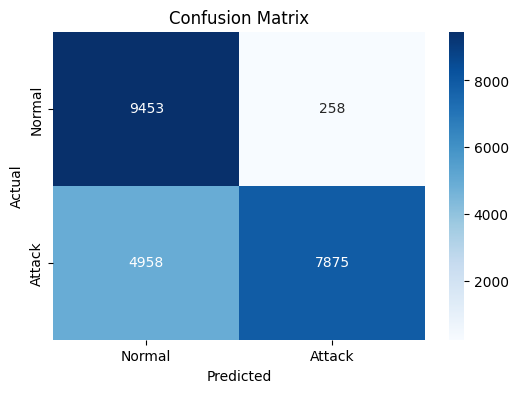

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Normal', 'Attack'], yticklabels=['Normal', 'Attack'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

**Step 6: Feature Importance Analysis**

Identify the most important features according to the Random Forest model.

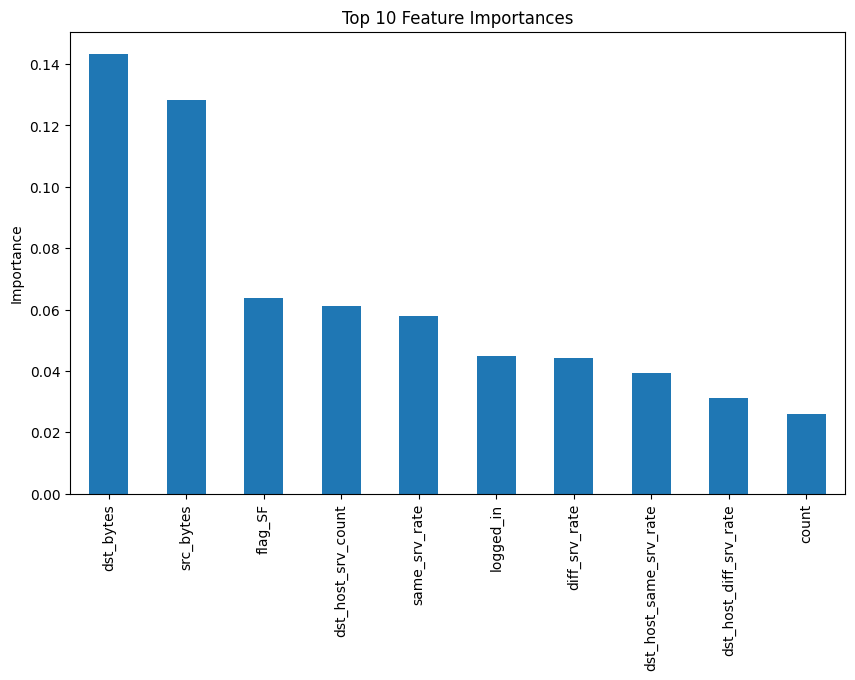

In [ ]:
# Get feature importances
importances = rf_classifier.feature_importances_

# Map feature importances to feature names
feature_importance = pd.Series(importances, index=X_train.columns)

# Sort the features by importance
feature_importance_sorted = feature_importance.sort_values(ascending=False)

# Plot the top 10 most important features
plt.figure(figsize=(10,6))
feature_importance_sorted[:10].plot(kind='bar')
plt.title('Top 10 Feature Importances')
plt.ylabel('Importance')
plt.show()

**Step 7: Save the Trained Model**

Use joblib to save and load the trained model.

In [ ]:
import joblib
from google.colab import drive # Removed the extra space at the beginning of this line

# Mount Google Drive
drive.mount('/content/drive')

# Save the model
joblib.dump(rf_classifier, '/content/drive/My Drive/Colab Notebooks/Implementation/rf_classifier_model.pkl')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['/content/drive/My Drive/Colab Notebooks/Implementation/rf_classifier_model.pkl']

**Step 8: Simulate Real-Time Data Processing**

Simulate how the model would process data in a fog computing environment.

8.1. Simulate Streaming Data

We'll process the test data in small batches to mimic real-time data streaming.

In [ ]:
import numpy as np

# Define batch size
batch_size = 1000

# Calculate the number of batches
n_batches = int(np.ceil(len(X_test_scaled) / batch_size))

for i in range(n_batches):
    start_idx = i * batch_size
    end_idx = min((i+1) * batch_size, len(X_test_scaled))
    X_batch = X_test_scaled[start_idx:end_idx]
    y_batch = y_test.iloc[start_idx:end_idx]

    # Predict using the trained model
    y_batch_pred = rf_classifier.predict(X_batch)

    # You can compute metrics for each batch if desired
    batch_accuracy = accuracy_score(y_batch, y_batch_pred)
    print(f"Batch {i+1}/{n_batches} - Accuracy: {batch_accuracy*100:.2f}%")

Batch 1/23 - Accuracy: 80.00%
Batch 2/23 - Accuracy: 78.30%
Batch 3/23 - Accuracy: 77.20%
Batch 4/23 - Accuracy: 74.70%
Batch 5/23 - Accuracy: 76.00%
Batch 6/23 - Accuracy: 76.80%
Batch 7/23 - Accuracy: 76.10%
Batch 8/23 - Accuracy: 78.90%
Batch 9/23 - Accuracy: 74.60%
Batch 10/23 - Accuracy: 76.60%
Batch 11/23 - Accuracy: 78.30%
Batch 12/23 - Accuracy: 78.00%
Batch 13/23 - Accuracy: 76.70%
Batch 14/23 - Accuracy: 76.10%
Batch 15/23 - Accuracy: 77.00%
Batch 16/23 - Accuracy: 76.40%
Batch 17/23 - Accuracy: 77.30%
Batch 18/23 - Accuracy: 77.60%
Batch 19/23 - Accuracy: 75.60%
Batch 20/23 - Accuracy: 76.90%
Batch 21/23 - Accuracy: 79.40%
Batch 22/23 - Accuracy: 73.70%
Batch 23/23 - Accuracy: 74.63%


**Step 9: Simulate Device Authentication with Blockchain**

Given the constraints of running everything on a single laptop, we'll simulate the blockchain authentication process using simple data structures.

9.1. Simulate a Simple Blockchain Ledger

In [ ]:
# Simulate a blockchain ledger as a dictionary
blockchain_ledger = {
    'device_001': 'authorized',
    'device_002': 'authorized',
    'device_003': 'revoked',
    'device_004': 'authorized',
    'device_005': 'authorized',
    'device_006': 'revoked',
    'device_007': 'authorized',
    'device_008': 'authorized',
    'device_009': 'authorized',
    'device_010': 'authorized'
}

# Function to authenticate a device using the simulated blockchain
def authenticate_device(device_id):
    status = blockchain_ledger.get(device_id, 'unauthorized')
    return status == 'authorized'

9.2. Combine Authentication with Anomaly Detection


In [ ]:
# Simulate device IDs for each data point
# For simplicity, we'll assign a random device ID from the ledger
import random

device_ids = ['device_001', 'device_002', 'device_003', 'device_004', 'device_005', 'device_006', 'device_007', 'device_008', 'device_009', 'device_010']

# Process a subset of the test data
for idx in range(100):  # Adjust the range as needed
    device_id = random.choice(device_ids)
    data_point = X_test_scaled[idx].reshape(1, -1)
    true_label = y_test.iloc[idx]

    # Authenticate the device
    if not authenticate_device(device_id):
        print(f"Device {device_id} is not authorized. Access denied.")
        continue

    # Perform anomaly detection
    prediction = rf_classifier.predict(data_point)

    # Take action based on the prediction
    if prediction[0] == 1:
        print(f"Anomaly detected from device {device_id}.")
        # Actions: log the event, alert the system, etc.
    else:
        print(f"Normal data received from device {device_id}.")

**Step 10: Integrate All Components in a Simulated Environment**

Create a function or script that simulates the fog node operations, integrating device authentication and anomaly detection.

In [ ]:
def fog_node_operation(device_id, data_point):
    # Authenticate the device
    if not authenticate_device(device_id):
        print(f"Device {device_id} is not authorized. Access denied.")
        return

    # Anomaly detection
    prediction = rf_classifier.predict(data_point)

    # Action based on prediction
    if prediction[0] == 1:
        print(f"Anomaly detected from device {device_id}. Taking appropriate action.")
        # Actions could include blocking the device, alerting administrators, etc.
    else:
        print(f"Data from device {device_id} is normal.")

# Simulate data reception at the fog node
for idx in range(1000):  # Adjust the range as needed
    device_id = random.choice(device_ids)
    data_point = X_test_scaled[idx].reshape(1, -1)
    fog_node_operation(device_id, data_point)

**Step 11: Collect and Present Results**

11.1. Record Metrics

During the simulation, collect metrics such as:

Number of devices authenticated vs. denied.
Number of anomalies detected.
Processing time per data point or batch.

11.2. Analyze Resource Utilization

Since we're running on a single laptop, monitor:

CPU and memory usage.
Time taken for model inference.
We can use Python's time module to measure execution time.

In [ ]:
import time

start_time = time.time()
# ... your code ...
end_time = time.time()
print(f"Processing time: {end_time - start_time} seconds")

Processing time: 5.054473876953125e-05 seconds
